# PRCP-1003

#                              Customer Transaction Prediction

# Problem Statement

A Customer Transaction Prediction problem typically involves predicting whether a customer will perform a certain transaction or not.

Task

Task 1:-Prepare a complete data analysis report on the given data.

|
Task 2:-Create a predictive model which will help the bank to identify which customer will make transactions in future.

# Attribute Information:


The dataset is anonymized so we cannot know which feature is what. There are a total of 200 features in this data set along with ID_code and target columns. The target columns contain 0 and 1 value where 0 means the customer will not do a transaction and 1 means the customer will do a transaction.




In [1]:
# import the Libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns 

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

# Domain Analysis

In this dataset, we have 202 columns for prediction for customer transiations.

In [2]:
# Load the Dataset
df=pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)

In [4]:
df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21   var_22  \
0  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791   
1  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524   
2  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145   
3  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202   
4  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085   
1  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   
2  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025   
3  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398   
4  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   

    var_31  var_32   var_33   var_34   var_35  var_36  var_37   var_38  \
0  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667   
1   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160   
2  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917   
3  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738   
4   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038   

   var_39   var_40   var_41   var_42   var_43   var_44   var_45   var_46  \
0  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418  -7.0170   5.9226   
1  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444 -47.3797   7.3718   
2  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006  -7.9078  11.1405   
3  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485 -24.6840  12.7404   
4  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087 -65.4863  13.8657   

    var_47   var_48   var_49   var_50   var_51  var_52  var_53  var_54  \
0 -14.2136  16.0283   5.3253  12.9194  29.0460 -0.6940  5.1736 -0.7474   
1   0.1948  34.4014  25.7037  11.8343  13.2256 -4.1083  6.6885 -8.0946   
2  -5.7864  20.7477   6.8874  12.9143  19.5856  0.7268  6.4059  9.3124   
3 -35.1659   0.7613   8.3838  12.6832   9.5503  1.7895  5.2091  8.0913   
4   0.0444  -0.1346  14.4268  13.3273  10.4857 -1.4367  5.7555 -8.5414   

    var_55   var_56  var_57  var_58   var_59   var_60   var_61  var_62  \
0  14.8322  11.2668  5.3822  2.0183  10.1166  16.1828   4.9590  2.0771   
1  18.5995  19.3219  7.0118  1.9210   8.8682   8.0109  -7.2417  1.7944   
2   6.2846  15.6372  5.8200  1.1000   9.1854  12.5963 -10.3734  0.8748   
3  12.3972  14.4698  6.5850  3.3164   9.4638  15.7820 -25.0222  3.4418   
4  14.1482  16.9840  6.1812  1.9548   9.2048   8.6591 -27.7439 -0.4952   

   var_63  var_64  var_65  var_66   var_67  var_68  var_69   var_70  var_71  \
0 -0.2154  8.6748  9.5319  5.8056  22.4321  5.0109 -4.7010  21.6374  0.5663   
1 -1.3147  8.1042  1.5365  5.4007   7.9344  5.0220  2.2302  40.5632  0.5134   
2  5.8042  3.7163 -1.1016  7.3667   9.8565  5.0228 -5.7828   2.3612  0.8520   
3 -4.3923  8.6464  6.3072  5.6221  23.6143  5.0220 -3.9989   4.0462

In [5]:
df.drop(columns=['ID_code'],inplace=True)

In [6]:
df.head(10)

target    var_0   var_1    var_2   var_3    var_4    var_5   var_6  \
0       0   8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187   
1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208   
2       0   8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427   
3       0  11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428   
4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405   
5       0  11.4763 -2.3182  12.6080  8.6264  10.9621   3.5609  4.5322   
6       0  11.8091 -0.0832   9.3494  4.2916  11.1355  -8.0198  6.1961   
7       0  13.5580 -7.9881  13.8776  7.5985   8.6543   0.8310  5.6890   
8       0  16.1071  2.4426  13.9307  5.6327   8.8014   6.1630  4.4514   
9       0  12.5088  1.9743   8.8960  5.4508  13.6043 -16.2859  6.0637   

     var_7   var_8   var_9  var_10   var_11   var_12   var_13   var_14  \
0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745   8.7989   
1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135   5.4345   
2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124   7.5244   
3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704   6.4569   
4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895   7.7894   
5  15.2255  3.5855  5.9790  0.8010  -0.6192  13.6380   1.2589   8.1939   
6  12.0771 -4.3781  7.9232 -5.1288  -7.5271  14.1629  13.3058   7.8412   
7  22.3262  5.0647  7.1971  1.4532  -6.7033  14.2919  10.9699   6.9190   
8  10.1854 -3.1882  9.0827  0.9501   1.7982  14.0654  -3.0572  11.1642   
9  16.8410  0.1287  7.9682  0.8787   3.0537  13.9639   0.8071   9.9240   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21   var_22  \
0  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791   
1  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524   
2  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145   
3  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202   
4  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102   
5  14.9894  12.0763  -1.4710   6.7341  14.8241  19.7172  11.9882   1.0468   
6  14.3363   7.5951  11.0922  21.1976   6.2946  15.8877  24.2595   8.1159   
7  14.2459   9.5376  -0.7226   5.1548  17.1535  13.7326  14.4195   1.2375   
8  14.8757  10.0075  -8.9472   3.8349   0.8560  10.6958   6.3738   6.5580   
9  15.2659  11.3900   1.5367   5.4649  13.6196  23.7806   4.4221   6.1695   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085   
1  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   
2  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025   
3  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398   
4  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   
5  3.8663   4.7252  13.9427  -1.2796 -4.3763  5.1494  0.4124  -5.0732   
6  3.9769   7.6851  13.3600  -0.5156  0.0690  5.6452  4.6140 -12.3890   
7  3.1711   9.1258  13.3250   3.3883 -0.4418  5.4501  7.9894  -0.9976   
8  2.6182  13.2506  13.7929 -14.4918 -2.5407  5.9575  2.4882 -11.1344   
9  3.2978   4.5923  13.3778  -3.2200 -2.3302  6.1120 -0.0289 -13.1141   

    var_31  var_32   var_33   var_34   var_35  var_36  var_37   var_38  \
0  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667   
1   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160   
2  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917   
3  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738   
4   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038   
5   4.9010  1.5459  15.6423  10.7209  15.1886  1.8685  7.7223   5.5317   
6  12.0880 -1.5290   9.2376  11.1510   6.6352  4.8462  7.0202  19.9479   
7  14.5609 -2.0712  16.9717  11.5257  -0.4990  2.8303  7.5772   9.0294   
8  10.5106 -1.0573  19.3290  12.2897  -2.8160  6.9208  5.1498  14.

In [7]:
df1=df.copy()

In [8]:
df1.shape

(200000, 201)

# stastical analysis

In [9]:
df1.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8          var_9         var_10  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       16.545850       0.284162       7.567236       0.394340   
std         3.418076       3.332634       1.235070       5.500793   
min         5.349700     -10.505500       3.970500     -20.731300   
25%        13.943800      -2.317800       6.618800      -3.594950   
50%        16.456800       0.393700       7.629600       0.487300   
75%        19.102900       2.937900       8.584425       4.382925   
max        27.691800      10.151300      11.150600      18.670200   

              var_11         var_12         var_13         var_14  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -3.245596      14.023978       8.530232       7.537606   
std         5.970253       0.190059       4.639536       2.247908   
min       -26.095000      13.434600      -6.011100       1.013300   
25%        -7.510600      13.894000       5.072800       5.781875   
50%        -3.286950      14.025500       8.604250       7.520300   
75%         0.852825      14.164200      12.274775       9.270425   
max        17.188700      14.654500      22.331500      14.937700   

              var_15         var_16         var_17         var_18  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       14.573126       9.333264      -5.696731      15.244013   
std         0.411711       2.557421       6.712612       7.851370   
min        13.076900       0.635100     -33.380200     -10.664200   
25%        14.262800       7.452275     -10.476225       9.177950   
50%        14.574100       9.232050      -5.666350      15.196250   
75%        14.874500      11.055900      -0.810775      21.013325   
max        15.863300      17.950600      19.025900      41.748000   

              var_19         var_20         var_21         var_22  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       12.438567      13.290894      17.257883       4.305430   
std         7.996694       5.876254       8.196564       2.847958   
min       -12.402500      -5.432200     -10.089000      -5.322500   
25%         6.276475       8.627800      11.551000       2.182400   
50%        12.453900      13.196800      17.234250       4.275150   
75%        18.433300      17.879400      23.089050       6.293200   
max        35.183000      31.285900      49.044300      14.594500   

              var_23         var_24         var_25         var_26  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        3.019540      10.584400      13.667496      -4.055133   
std         0.526893       3.777245       0.285535       5.922210   
min   

<Axes: xlabel='target', ylabel='count'>

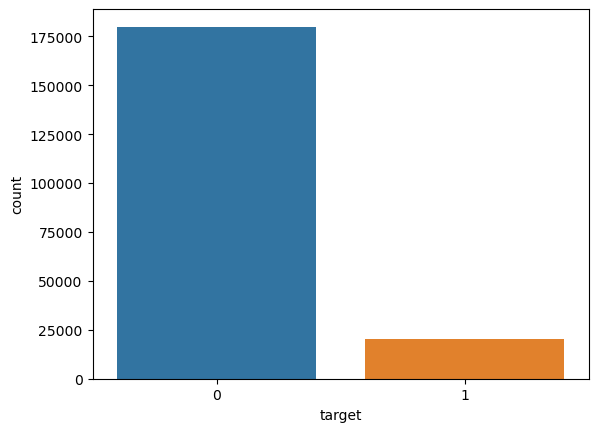

In [10]:
sns.countplot(x ='target', data = df1)

# Data Preprocessing

# Task1:

prepare a complete data analysis report on the given dataset

In [11]:
print(df1.isnull().sum())

target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
var_50     0
var_51     0
var_52     0
var_53     0
var_54     0
var_55     0
var_56     0
var_57     0
var_58     0
var_59     0
var_60     0
var_61     0
var_62     0
var_63     0
var_64     0
var_65     0
var_66     0
var_67     0
var_68     0
var_69     0
var_70     0
var_71     0
var_72     0
var_73     0
var_74     0
var_75     0

In [12]:
dupli_row_col = df1[df1.duplicated(keep=False)]

dupli_row_col

Empty DataFrame
Columns: [target, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, var_10, var_11, var_12, var_13, var_14, var_15, var_16, var_17, var_18, var_19, var_20, var_21, var_22, var_23, var_24, var_25, var_26, var_27, var_28, var_29, var_30, var_31, var_32, var_33, var_34, var_35, var_36, var_37, var_38, var_39, var_40, var_41, var_42, var_43, var_44, var_45, var_46, var_47, var_48, var_49, var_50, var_51, var_52, var_53, var_54, var_55, var_56, var_57, var_58, var_59, var_60, var_61, var_62, var_63, var_64, var_65, var_66, var_67, var_68, var_69, var_70, var_71, var_72, var_73, var_74, var_75, var_76, var_77, var_78, var_79, var_80, var_81, var_82, var_83, var_84, var_85, var_86, var_87, var_88, var_89, var_90, var_91, var_92, var_93, var_94, var_95, var_96, var_97, var_98, ...]
Index: []

# Graphics

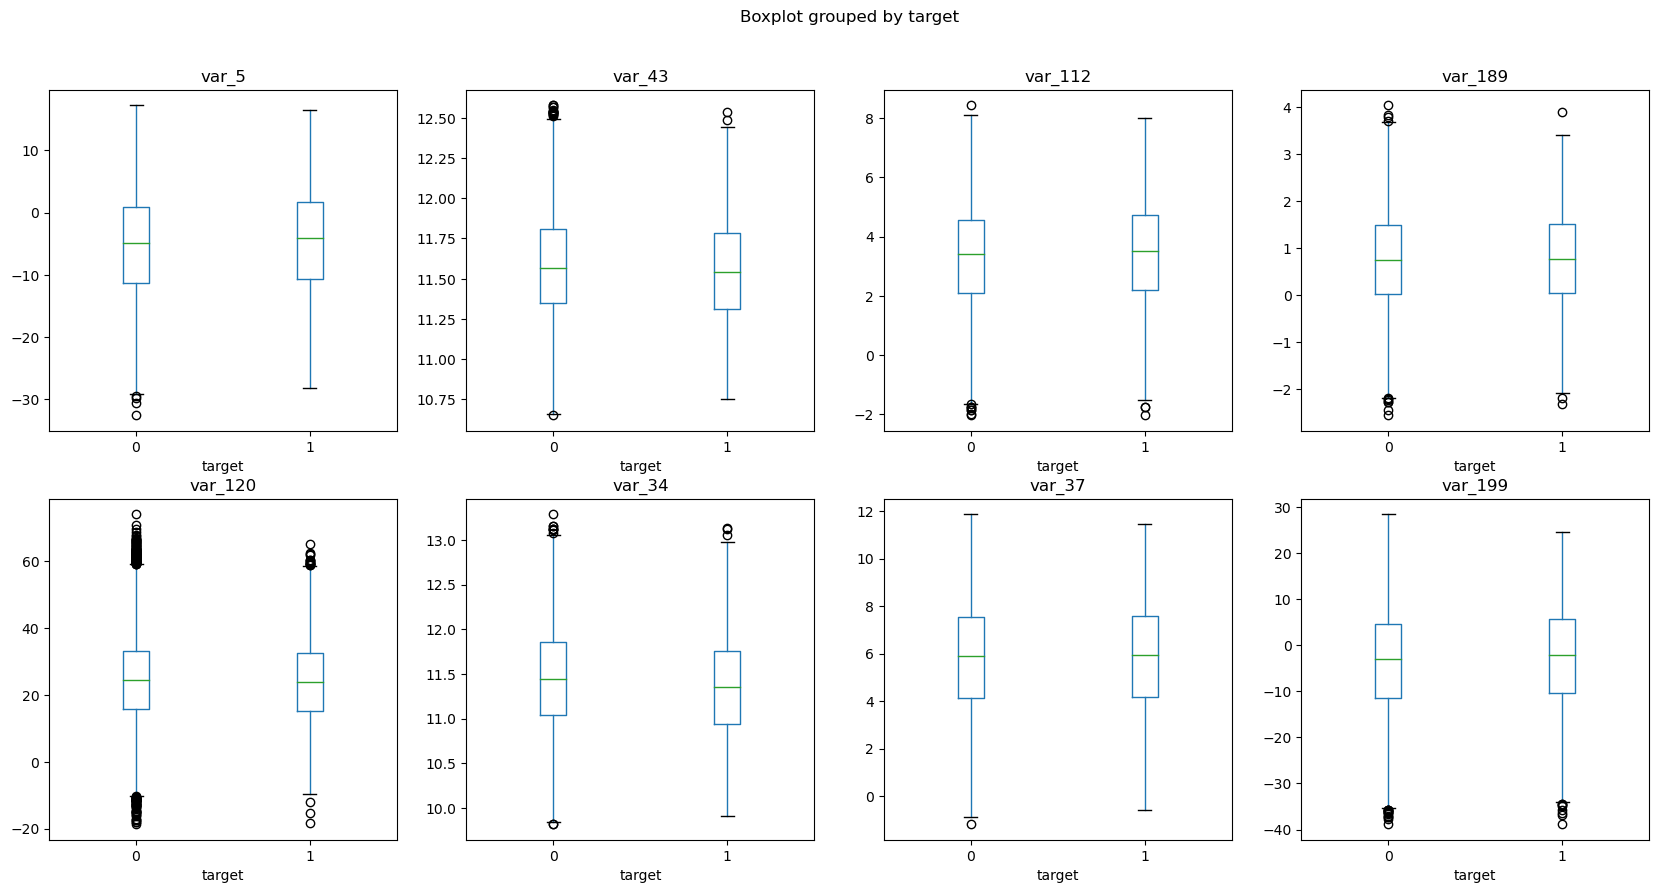

In [13]:
# Some random boxplot against the target

fig, ax = plt.subplots(2,4,figsize=(20,10), sharey=False);
df1.boxplot(["var_5", "var_43", "var_112", "var_189", "var_120", "var_34", "var_37", "var_199"], by="target", grid=False, ax=ax);

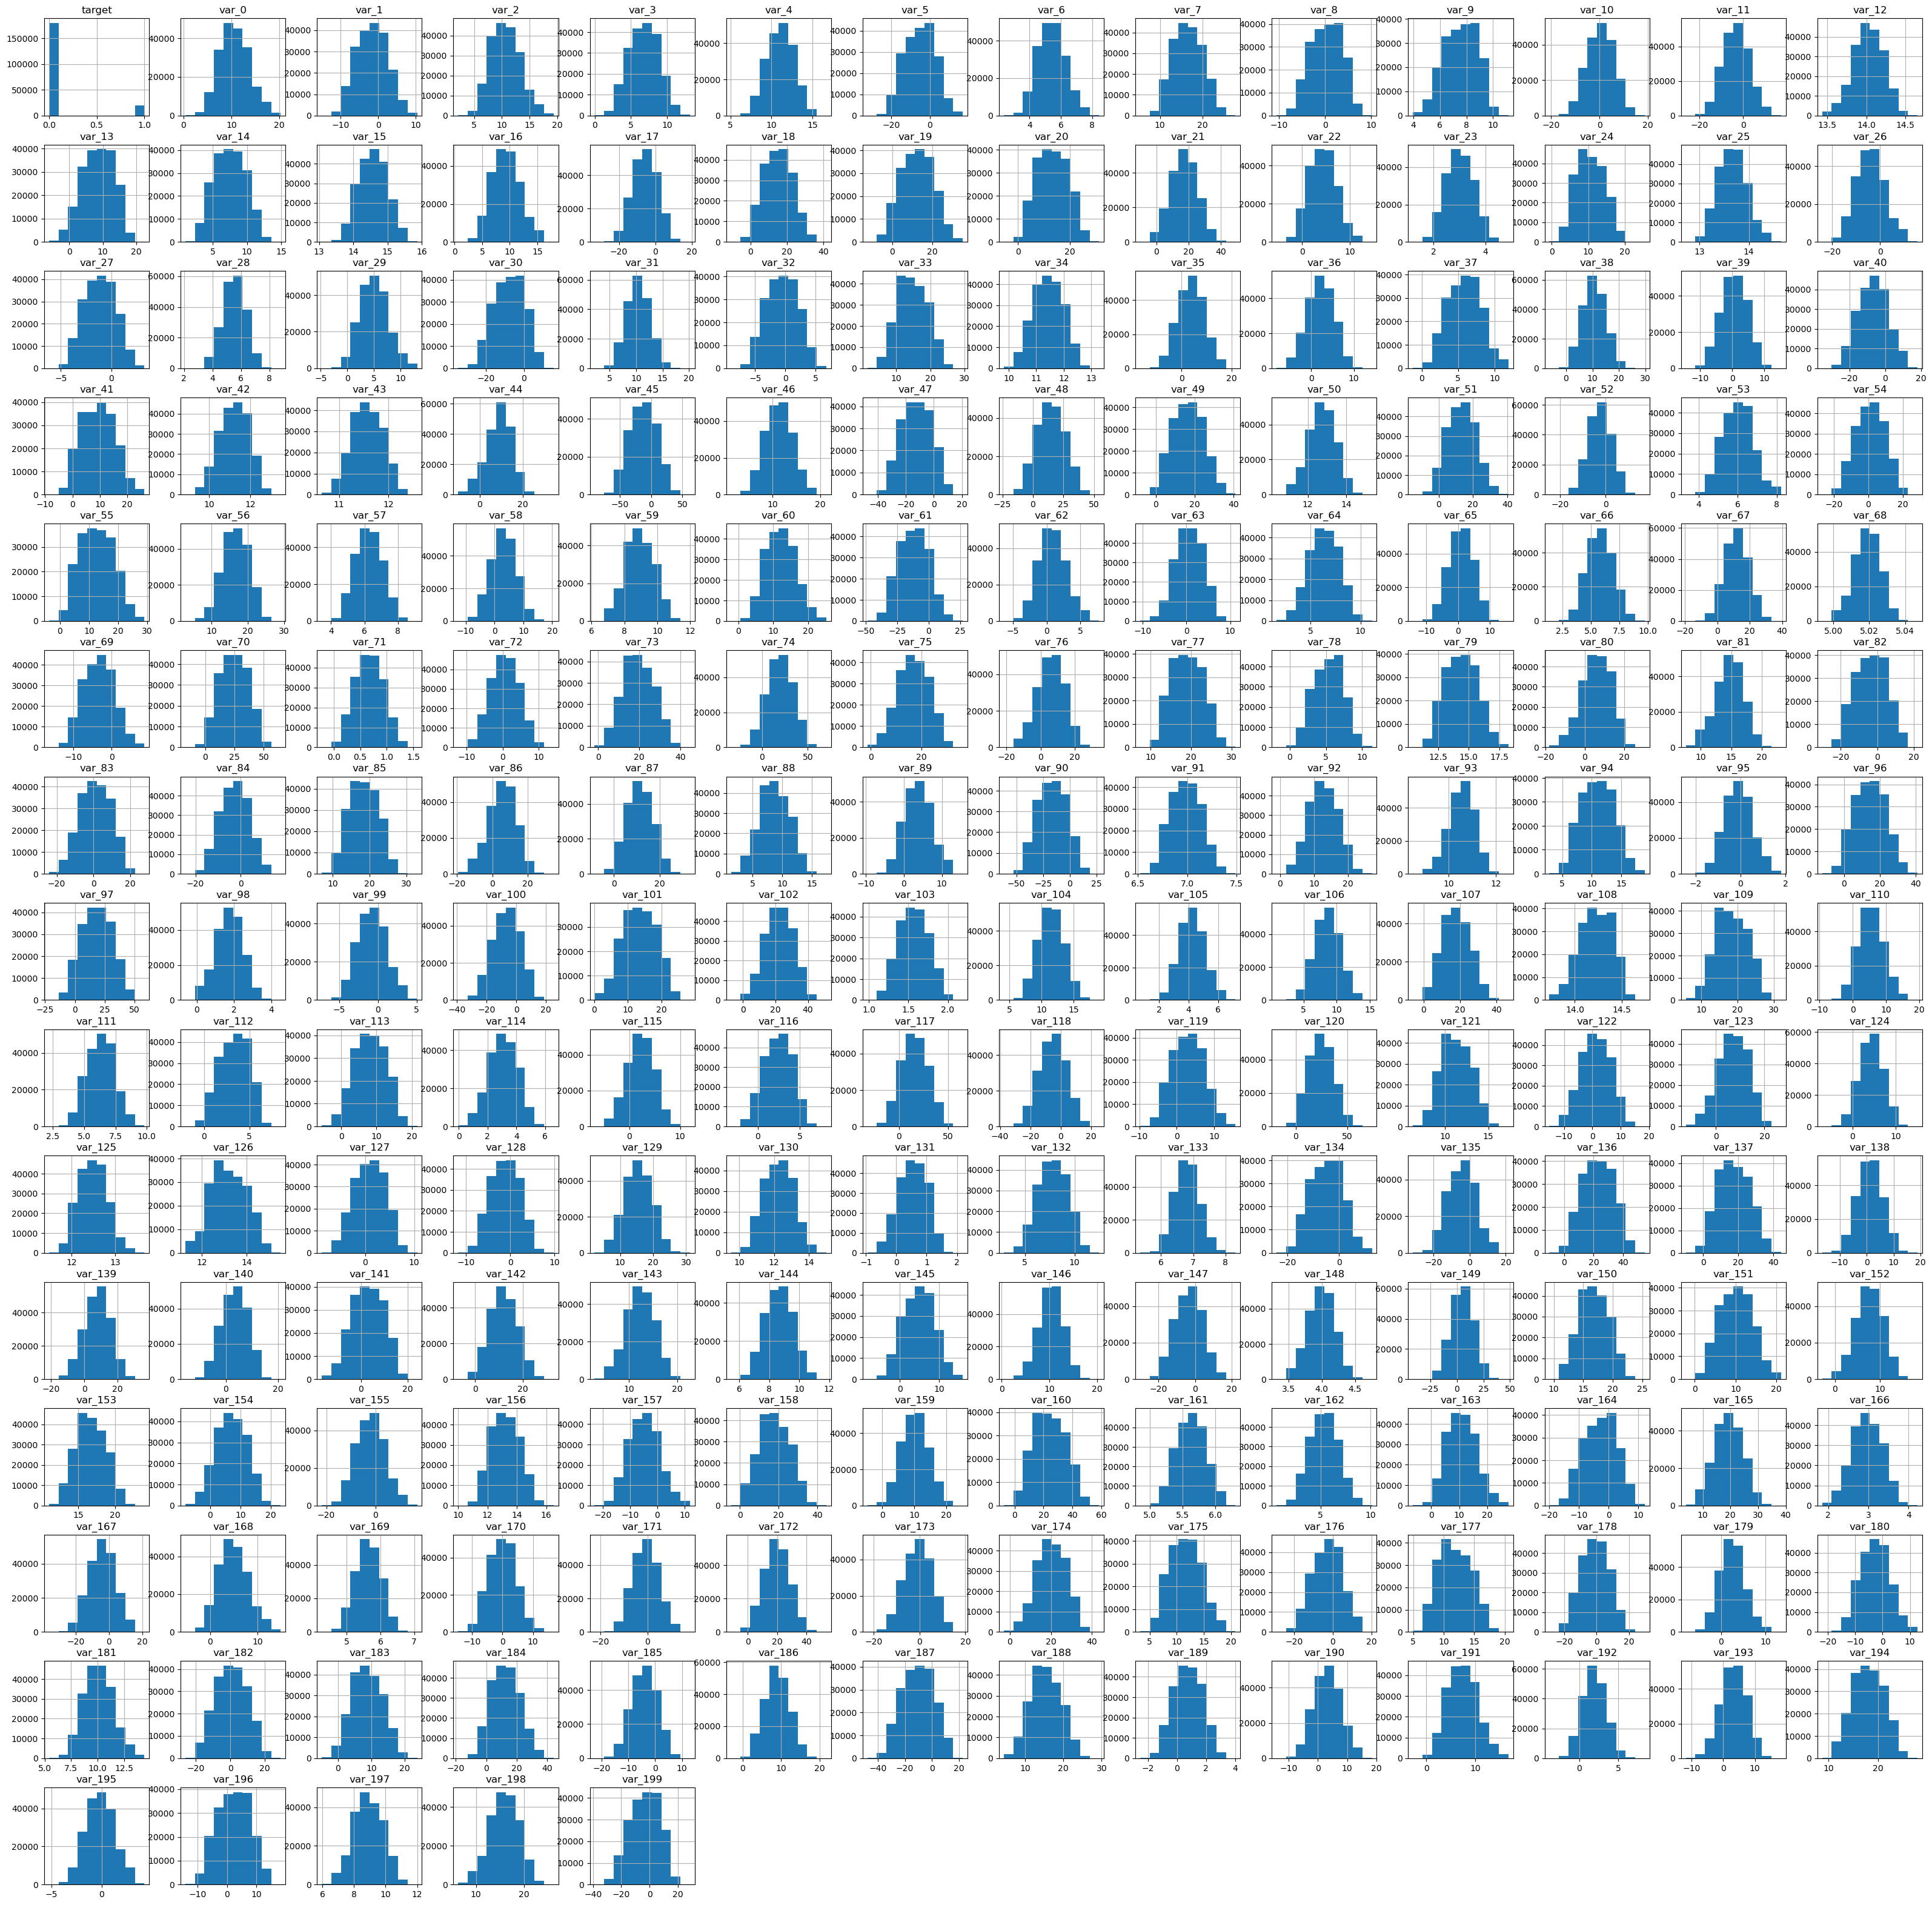

In [14]:
# How's the data distributed?
df1.hist(figsize=(40,40));

# Correlations

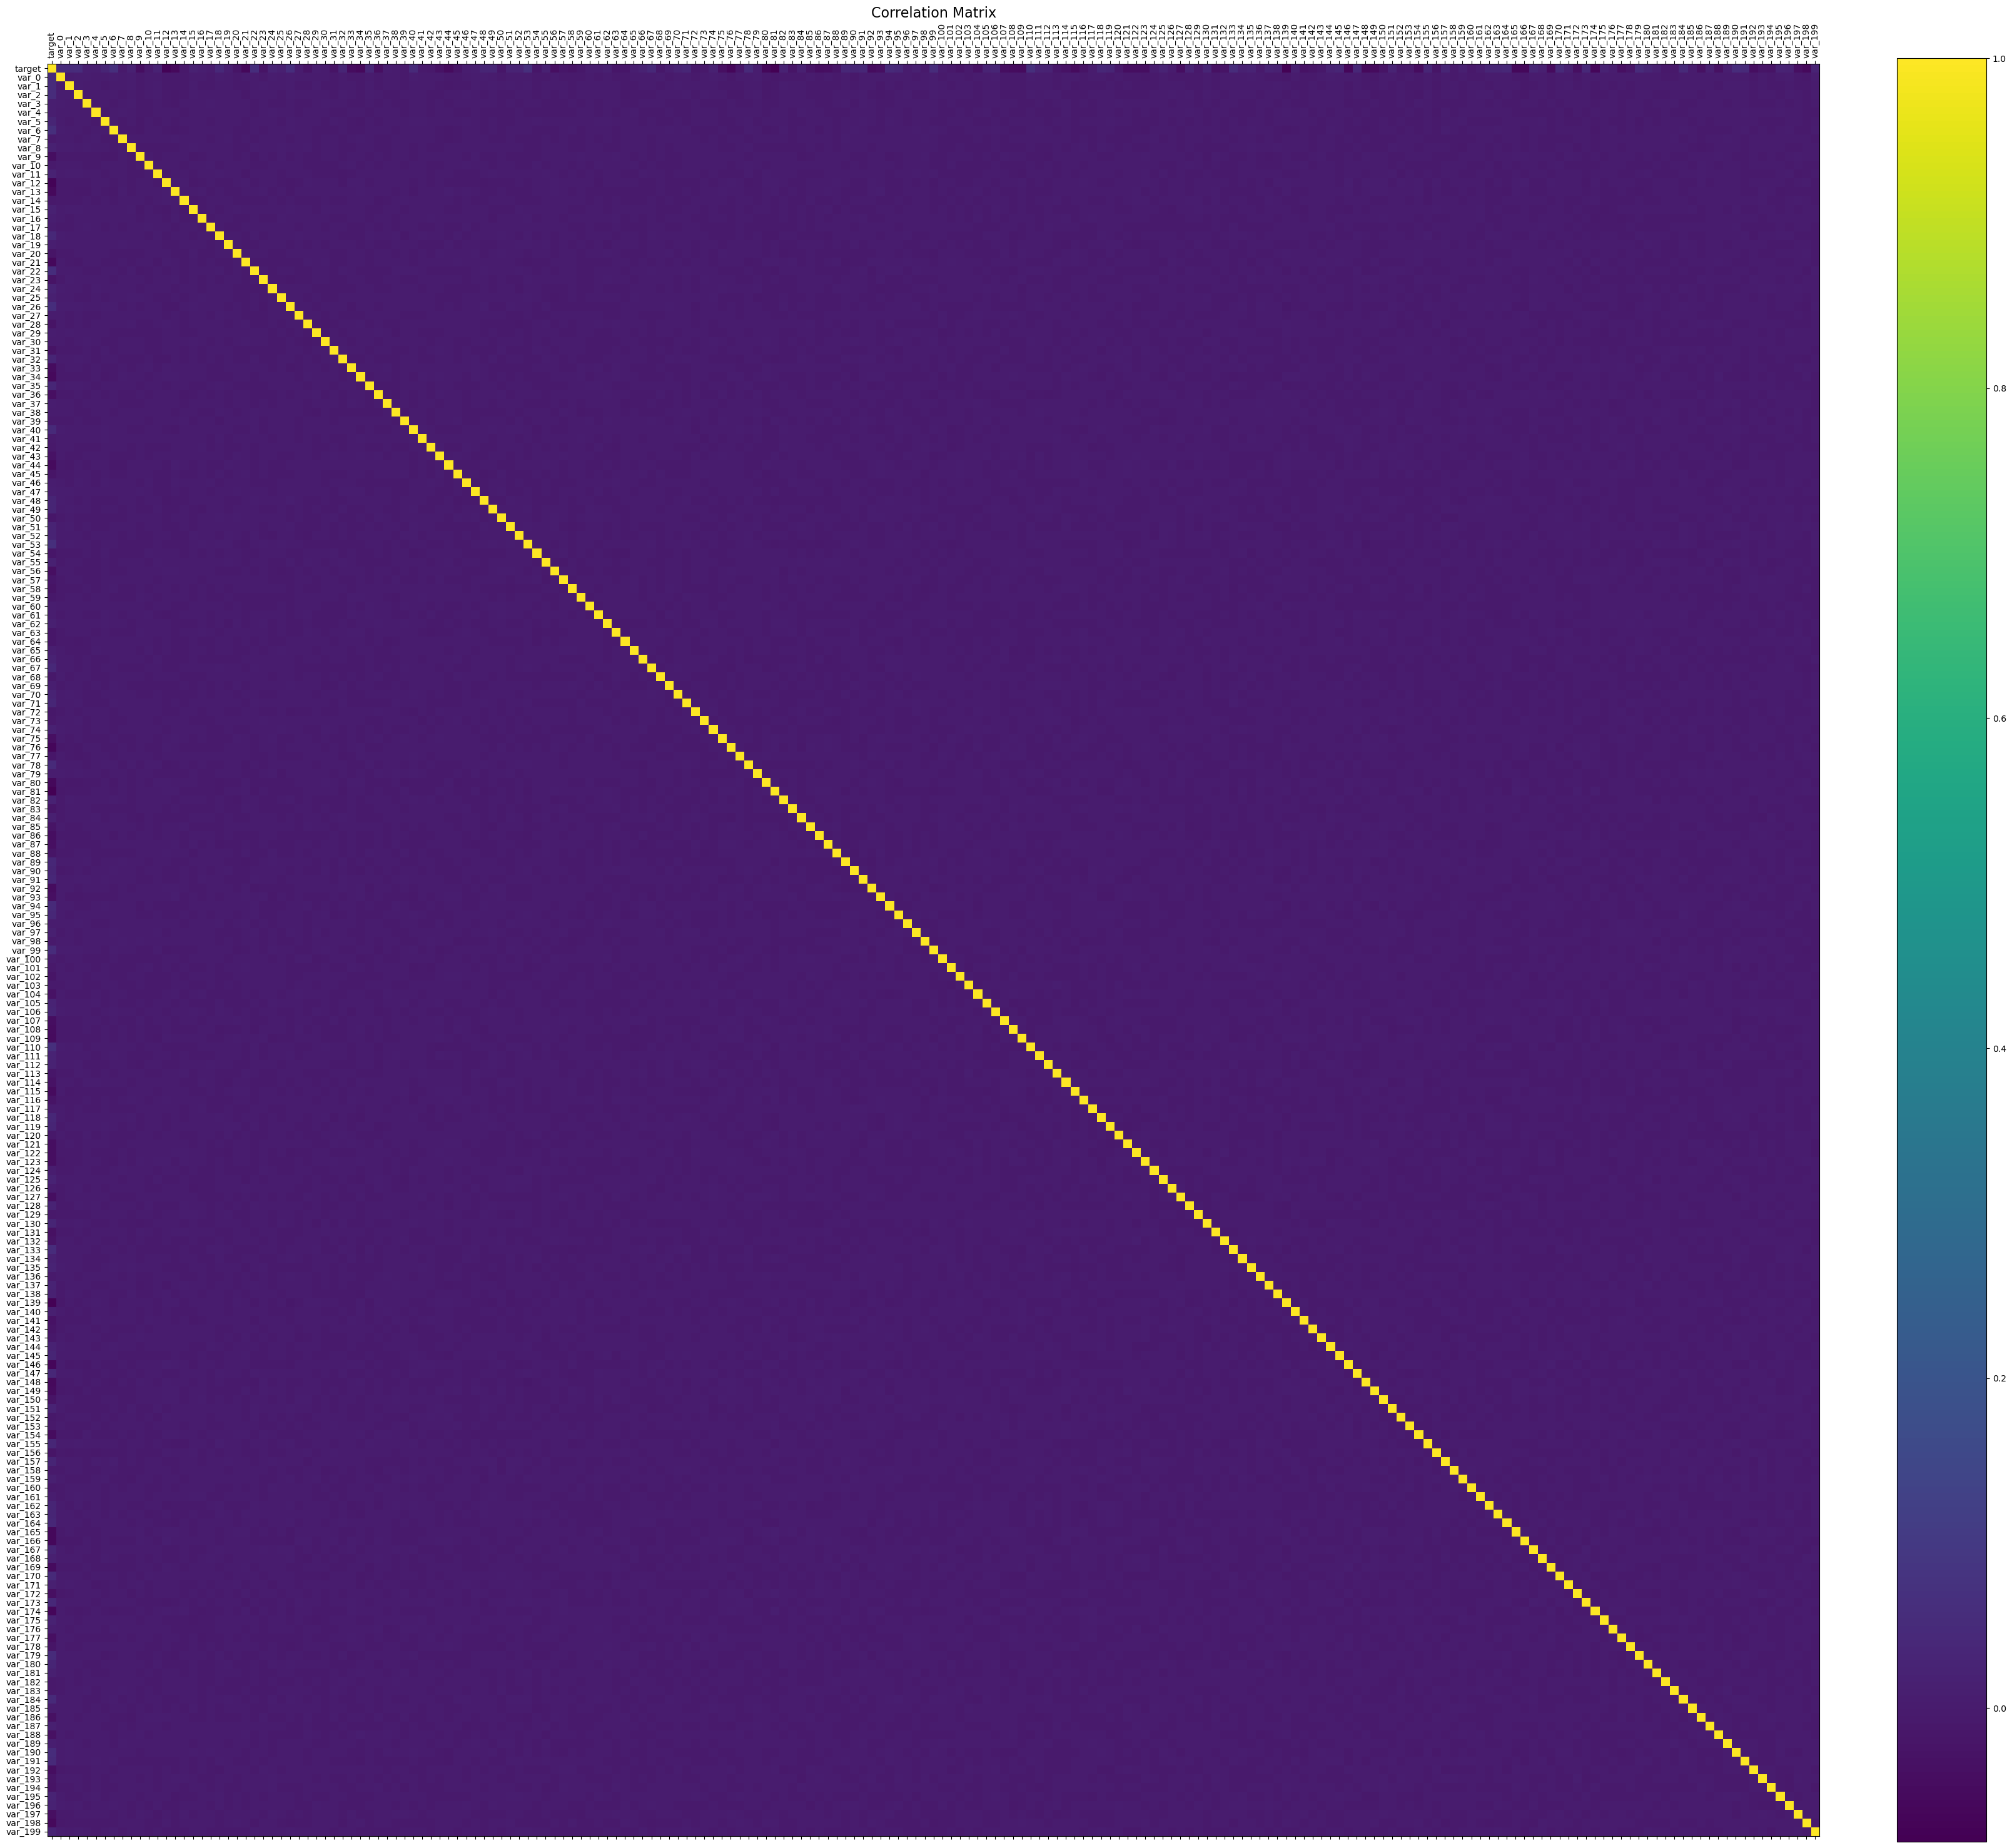

In [15]:
f = plt.figure(figsize=(40, 40))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df1.shape[1]), df1.columns, rotation=90)
plt.yticks(range(df1.shape[1]), df1.columns)
plt.colorbar(fraction=0.046, pad = 0.04)
plt.title('Correlation Matrix', fontsize=16);

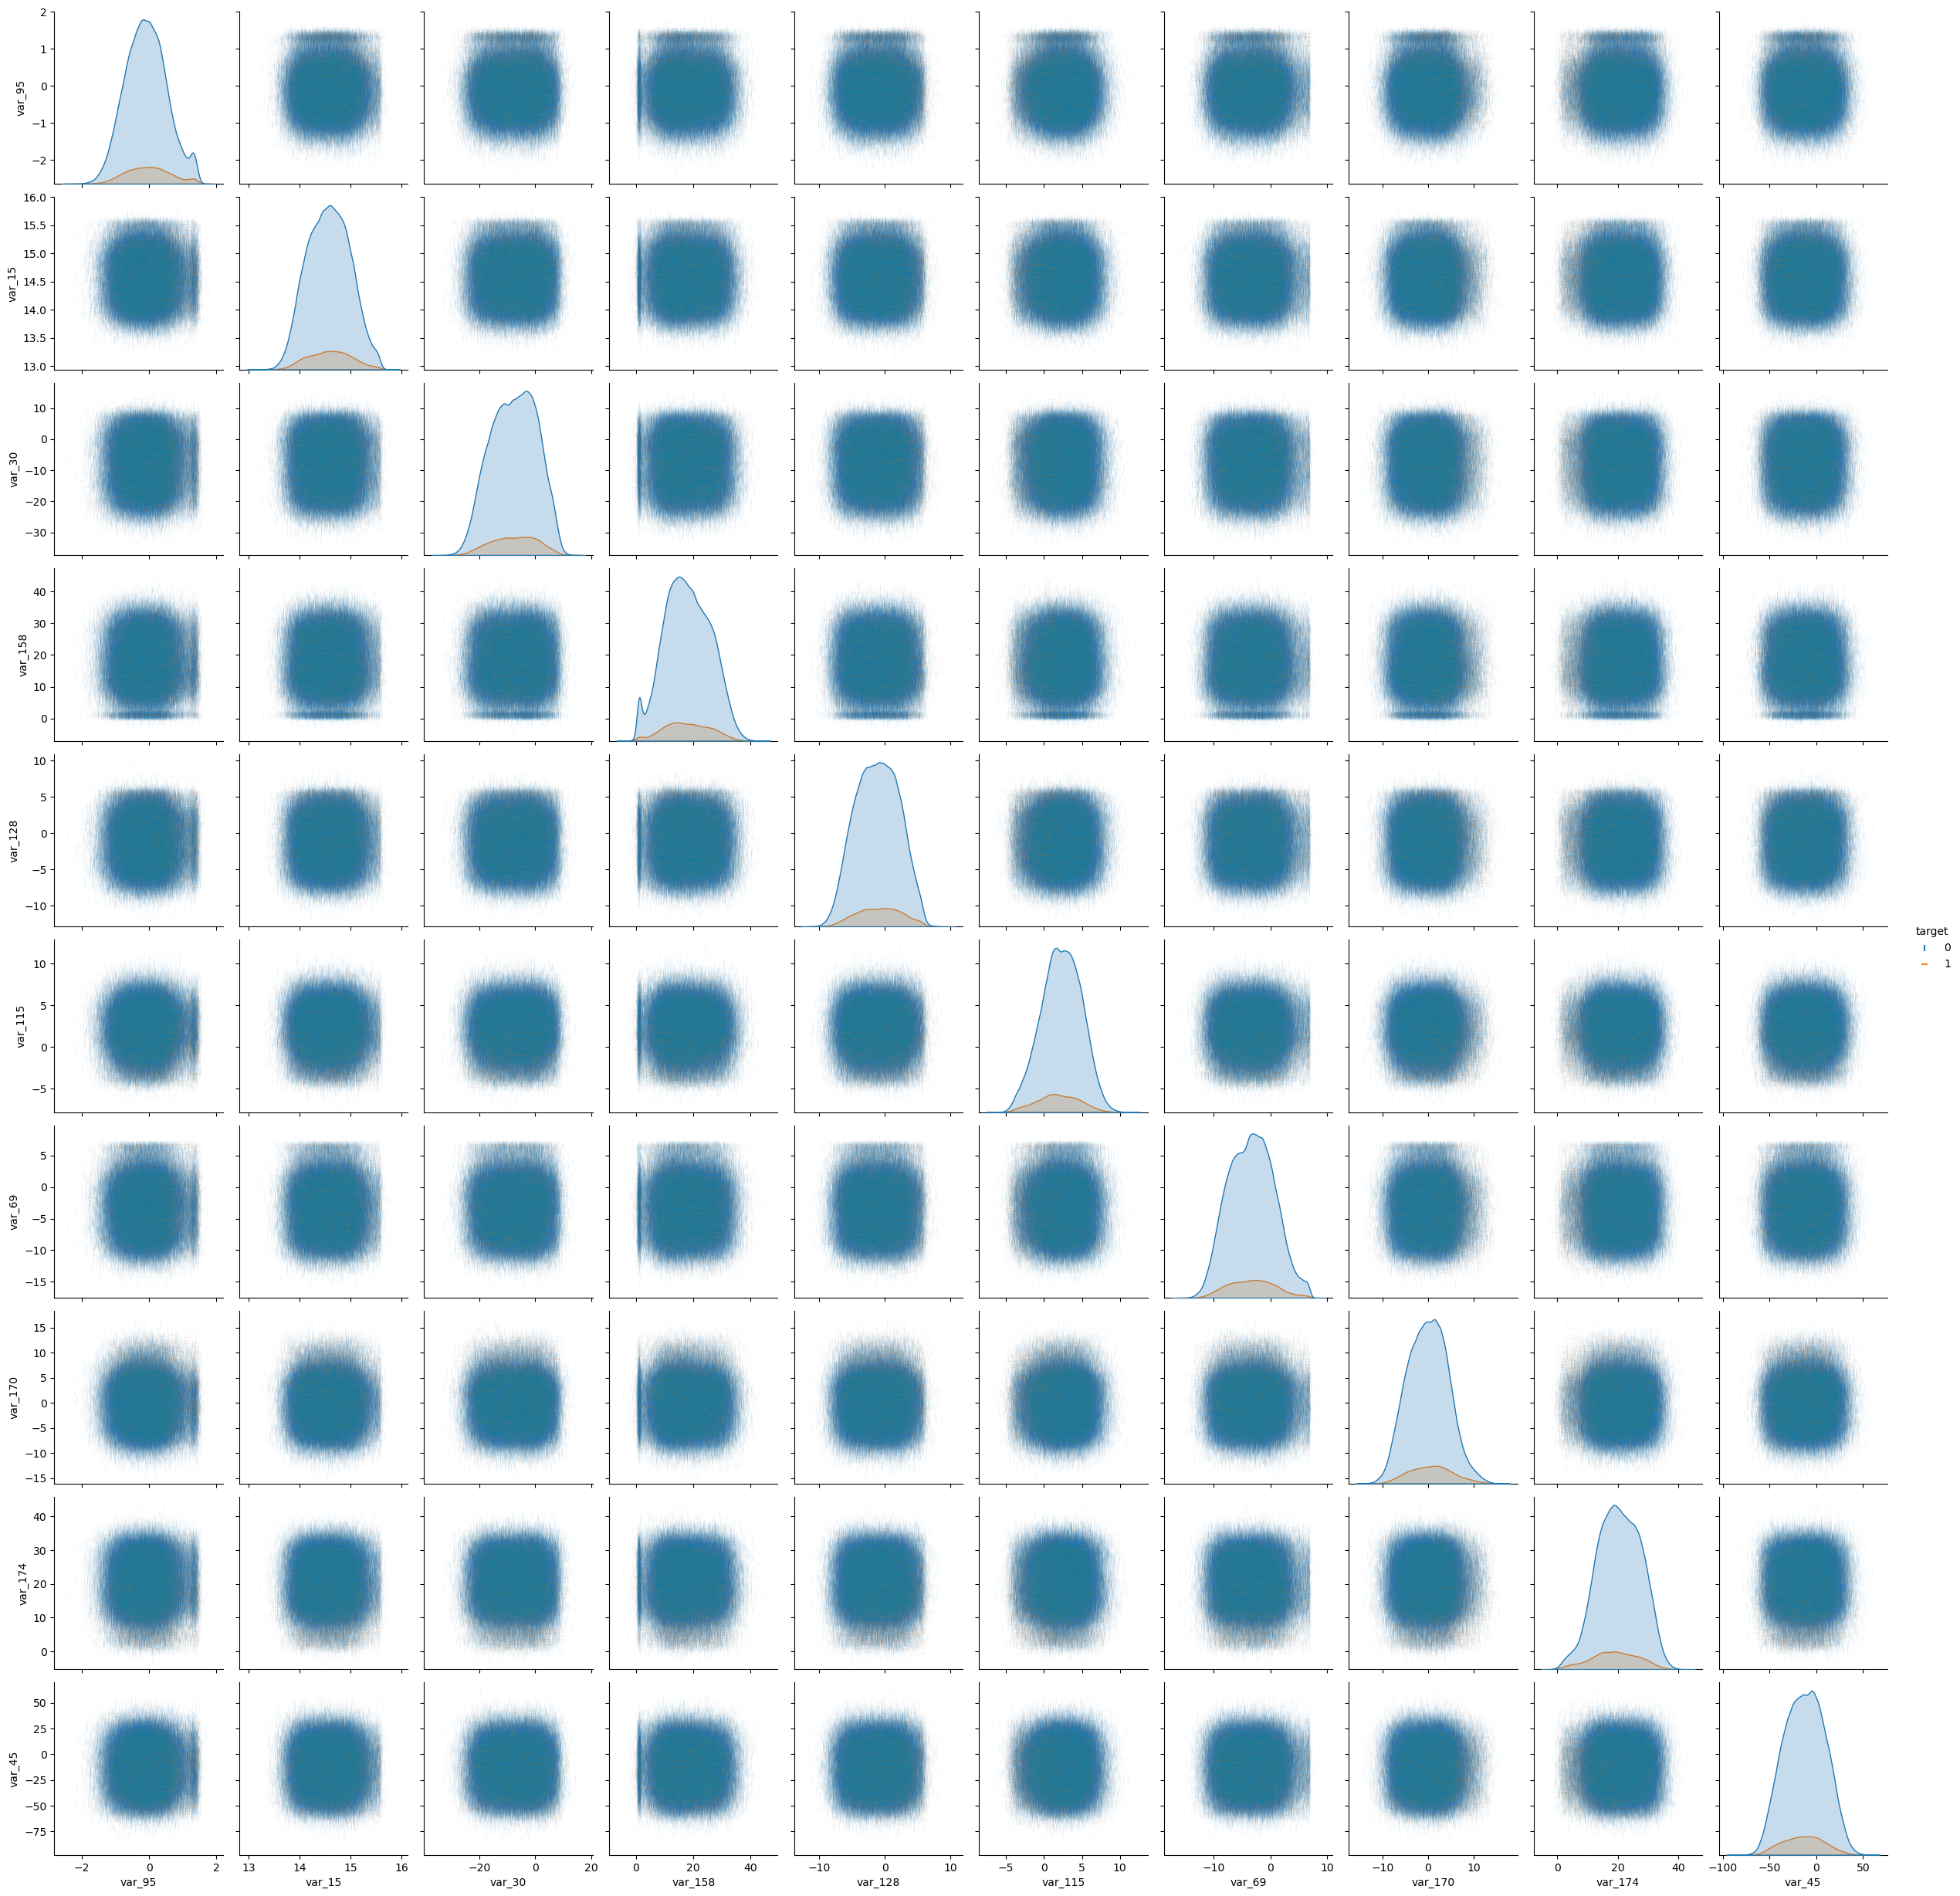

In [16]:
# Plotting the correlation of 10 random features

random_columns = df1.drop("target", axis=1).sample(10, axis=1, random_state=42).columns.to_list()
sns.pairplot(df1, vars=random_columns, hue="target", plot_kws={'alpha':0.05}, markers=['|','_']); # 0 is blue and 1 is orange

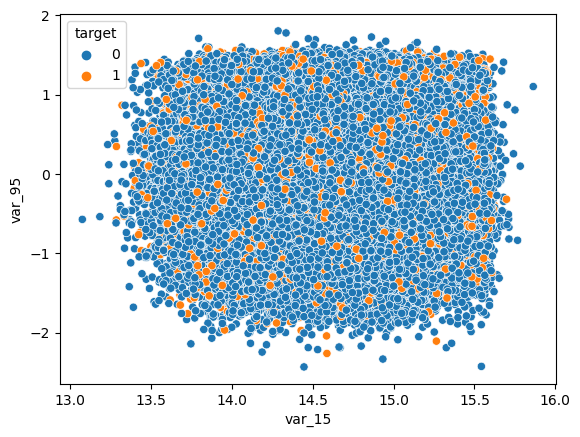

In [17]:
# Looking at the previous plot it seems that when the target is 1 it's concentrated in the middle of the data, however having a closer look shows a more random picture
sns.scatterplot(x="var_15", y="var_95", hue="target", data = df1);

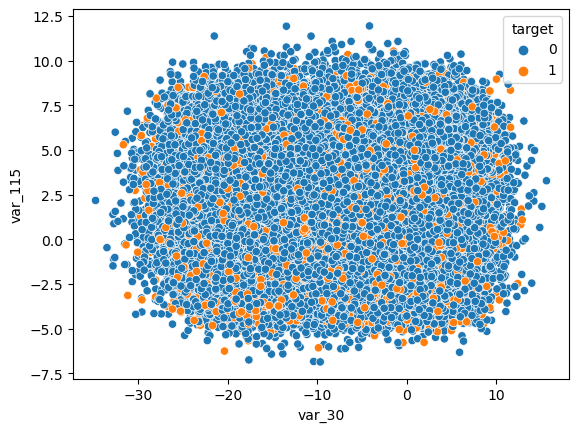

In [18]:
sns.scatterplot(x="var_30", y="var_115", hue="target", data = df1);

In [19]:
# split the x, y
x=df1.drop(columns=['target'])
y=df1['target']

# Feature Engineering

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(x)

X=pd.DataFrame(X_scaled, columns=x.columns)

X.describe()

var_0         var_1         var_2         var_3         var_4  \
count  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean   6.937917e-16 -2.669864e-17 -7.309708e-16 -7.414513e-17 -6.217959e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.378739e+00 -3.312510e+00 -3.255758e+00 -3.345903e+00 -3.698703e+00   
25%   -7.322476e-01 -7.684882e-01 -7.545633e-01 -7.548787e-01 -7.363223e-01   
50%   -5.104015e-02  4.832475e-03 -5.119182e-02  1.393366e-02  1.843135e-02   
75%    6.836369e-01  7.373387e-01  6.821601e-01  7.475948e-01  7.287035e-01   
max    3.169391e+00  2.964030e+00  3.270797e+00  3.128139e+00  3.445820e+00   

              var_5         var_6         var_7         var_8         var_9  \
count  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean   3.385736e-17 -8.895995e-17  6.768275e-16 -4.796163e-18  1.430891e-15   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.496937e+00 -3.532923e+00 -3.275579e+00 -3.237586e+00 -2.912180e+00   
25%   -7.802162e-01 -7.399549e-01 -7.612636e-01 -7.807544e-01 -7.679231e-01   
50%    2.952565e-02 -2.751966e-02 -2.605270e-02  3.286843e-02  5.049414e-02   
75%    7.617868e-01  6.854925e-01  7.480983e-01  7.962906e-01  8.235900e-01   
max    2.838130e+00  3.506501e+00  3.260893e+00  2.960770e+00  2.901352e+00   

             var_10        var_11        var_12        var_13        var_14  \
count  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean   1.705303e-17 -6.959766e-17  5.648602e-15  5.563194e-16 -1.126850e-15   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.840481e+00 -3.827218e+00 -3.101029e+00 -3.134229e+00 -2.902397e+00   
25%   -7.252228e-01 -7.143775e-01 -6.838822e-01 -7.452128e-01 -7.810530e-01   
50%    1.689934e-02 -6.926677e-03  8.009110e-03  1.595371e-02 -7.698783e-03   
75%    7.250945e-01  6.864753e-01  7.377834e-01  8.070963e-01  7.708603e-01   
max    3.322413e+00  3.422694e+00  3.317512e+00  2.974716e+00  3.291999e+00   

             var_15        var_16        var_17        var_18        var_19  \
count  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean  -2.467004e-15 -2.629008e-16 -9.663381e-18  1.162448e-16  2.644285e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.634171e+00 -3.401155e+00 -4.124108e+00 -3.299842e+00 -3.106425e+00   
25%   -7.537479e-01 -7.355042e-01 -7.120188e-01 -7.726139e-01 -7.705819e-01   
50%    2.366083e-03 -3.957676e-02  4.525969e-03 -6.083412e-03  1.917381e-03   
75%    7.320052e-01  6.735849e-01  7.278788e-01  7.348178e-01  7.496533e-01   
max    3.133693e+00  3.369550e+00  3.683021e+00  3.375723e+00  2.844237e+00   

             var_20        var_21        var_22        var_23        var_24  \
count  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean  -1.457323e-16 -4.666845e-16 -5.595524e-17 -1.101554e-15 -2.598100e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.186238e+00 -3.336392e+00 -3.380652e+00 -3.434744e+00 -2.981757e+00   
25%   -7.935508e-01 -6.962548e-01 -7.454590e-01 -7.315345e-01 -7.866599e-01   
50%   -1.601264e-02 -2.883263e-03 -1.063237e-02 -2.066793e-02 -5.402100e-02   
75%    7.808576e-01  7.114179e-01  6.979648e-01  7.292958e-01  7.664864e-01   
max    3.062334e+00  3.878027e+00  3.612797e+00  3.521898e+00  3.934517e+00   

             var_25        var_26        var_27        var_28        var_29  \
count  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean   1.204186e-14  5.947243e-17 -1.846345e-16 -1.510614e-16  2.060574e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.318321e+00 -3.408866e+00 -3.300425e+00 -4.395624e+00 -3.761972e+00   
25%   -7.393006e-01 -7.204409e-01 -7.678575e-01 -6.904564e-

# Feature Slection

In [21]:
# Calculate the correlation matrix

corr_mat = df1.corr()

In [22]:
correlation_with_target = corr_mat['target'].sort_values(ascending=False)

correlation_with_target

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
var_22     0.060558
var_99     0.058367
var_190    0.055973
var_2      0.055870
var_133    0.054548
var_0      0.052390
var_1      0.050343
var_179    0.050002
var_40     0.049530
var_184    0.048315
var_78     0.048245
var_170    0.047973
var_191    0.047114
var_94     0.046296
var_67     0.044673
var_18     0.043479
var_173    0.042022
var_164    0.040997
var_118    0.040358
var_147    0.040280
var_91     0.040127
var_89     0.039369
var_95     0.038531
var_155    0.037240
var_35     0.036567
var_71     0.033607
var_106    0.032947
var_162    0.032647
var_157    0.032642
var_48     0.032334
var_163    0.031811
var_180    0.031190
var_5      0.030979
var_119    0.030975
var_145    0.030917
var_167    0.030797
var_49     0.030612
var_32     0.030513
var_130    0.029917
var_90     0.029395
var_24     0.028477
var_195    0.028285
var_125    0.028223
var_135    0.027944
var_52     0.027754


# Machine Learning Part

# Task 2:


Create a predictive model which will help the bank to identify which customer will make transactions in future.


Common Imports in Ml

In [23]:
# split training data and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(140000, 200) (60000, 200) (140000,) (60000,)


# Evlaution Matrices

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()

dt_model.fit(X_train,y_train)

dt_pred=dt_model.predict(X_test)

In [26]:
dt_accur=accuracy_score (y_test, dt_pred)

print('Accuracy', dt_accur)

Accuracy 0.834


In [27]:
dt_preci=precision_score(y_test, dt_pred)

print('\nPrecision', dt_preci)


Precision 0.20196813495782567


In [28]:
dt_recall=recall_score(y_test, dt_pred)

print('\nRecall', dt_recall)


Recall 0.21044921875


In [29]:
dt_f1score=f1_score(y_test, dt_pred)

print('\nF1 score', dt_f1score)


F1 score 0.20612147297943567


In [30]:
dt_roc_auc= roc_auc_score(y_test, dt_pred)

print('\nRoc_Auc', dt_roc_auc)


Roc_Auc 0.5577925683767825


In [31]:
print('\n',classification_report(y_test, dt_pred))



               precision    recall  f1-score   support

           0       0.91      0.91      0.91     53856
           1       0.20      0.21      0.21      6144

    accuracy                           0.83     60000
   macro avg       0.56      0.56      0.56     60000
weighted avg       0.84      0.83      0.84     60000



# Hyperparameter Tuning Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV


dt_classifier = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [33]:
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)







In [ ]:
grid_search.fit(X, y)


In [ ]:
best_params = grid_search.best_params_

best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)

print("Best Accuracy Score:", best_score)


# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(n_estimators=10)

rf_model.fit(X_train,y_train)

rf_pred=rf_model.predict(X_test)

In [35]:
rf_accur=accuracy_score(y_test, rf_pred)

print('\nAccuracy score', rf_accur)


Accuracy score 0.8979333333333334


In [36]:
rf_precision=precision_score(y_test,rf_pred)

print('\nPrecision score', rf_precision)


Precision score 0.5666666666666667


In [37]:
rf_recall=recall_score(y_test,rf_pred)

print('\nRecall score', rf_recall)


Recall score 0.013834635416666666


In [38]:
rf_f1score=f1_score(y_test,rf_pred)

print('\nF1 score', rf_f1score)


F1 score 0.027009850651414043


In [39]:
rf_roc_auc= roc_auc_score(y_test, rf_pred)

print('\nRoc_Auc', rf_roc_auc)


Roc_Auc 0.5063138566269311


In [40]:
print('\n',classification_report(y_test, rf_pred))


               precision    recall  f1-score   support

           0       0.90      1.00      0.95     53856
           1       0.57      0.01      0.03      6144

    accuracy                           0.90     60000
   macro avg       0.73      0.51      0.49     60000
weighted avg       0.86      0.90      0.85     60000



# Prediction
* Decision Tree & Random Forest : 89% 

# Conclusion
*  With the aim of strengthening customer interaction and commercial strategies, we set out to comprehend and anticipate customer behavior in this customer transaction prediction project.

* We were able to make useful recommendations as a result of our analysis and predictive models' insightful insights into transaction trends and patterns.